In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
# import matplotlib as mlp
# mlp.rcParams["axes.unicode_minus"] = False

from google.colab import drive
import glob

import warnings
warnings.filterwarnings(action='ignore')

## 데이터 준비

In [2]:
# 구글 드라이브 연결
drive.mount("/content/gdrive/")

# data 경로 저장
data_path = "/content/gdrive/MyDrive/공모전/data/"

Mounted at /content/gdrive/


# 시각화

## 1) 노인의 기능 상태 제한 현황 및 일상생활 불편함 정도

### 논문

In [ ]:
# df1 = pd.read_excel('/content/gdrive/MyDrive/공모전/data/노인의_기능상태_제한_현황_20240109092020.xlsx')
df2 = pd.read_excel('/content/gdrive/MyDrive/공모전/data/논문_데이터_일상생활_불편함.xlsx')
df3 = pd.read_excel('/content/gdrive/MyDrive/공모전/data/논문_데이터_보조기_사용_여부.xlsx')

In [ ]:
df2.set_index('종류', inplace=True)
df3.set_index('종류', inplace=True)

col_list=['불편하지 않다', '불편한 편이다', '매우 불편하다']
df2 = df2[col_list]
df2 = df2.transpose()

In [ ]:
display(df2, df3)

종류,시력,청력,씹기능력
불편하지 않다,65.0,75.4,60.5
불편한 편이다,32.2,22.1,34.8
매우 불편하다,2.8,2.6,4.7


,사용률,계,명
종류,,,
시력,54.0,100,10097
청력,11.2,100,10097
씹기능력,36.9,100,10097


Text(0.5, 1.0, '일상생활 불편함(2020): 청력')

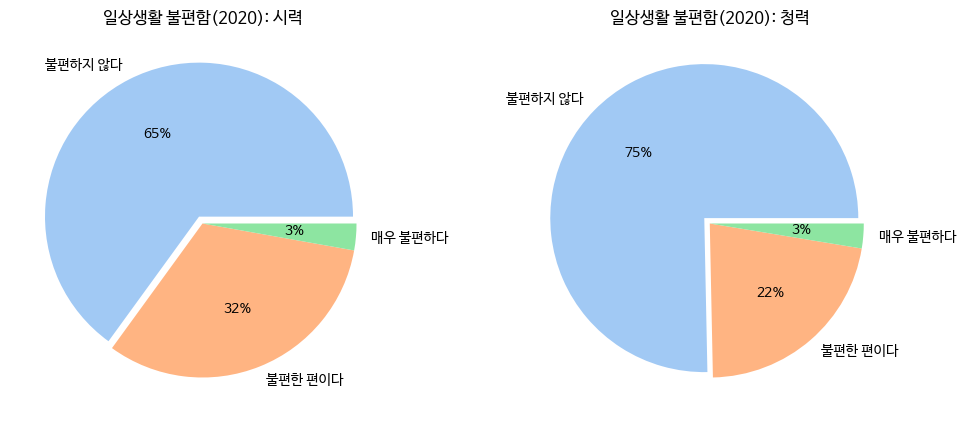

In [ ]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

colors = sns.color_palette('pastel')
explode = [0.05, 0, 0]

ax1.pie(df2["시력"],
        labels=col_list,
        colors = colors, autopct='%.0f%%',
        explode=explode)

ax2.pie(df2["청력"],
        labels=col_list,
        colors = colors, autopct='%.0f%%',
        explode=explode)

ax1.set_title('일상생활 불편함(2020): 시력')
ax2.set_title('일상생활 불편함(2020): 청력')

Text(0.5, 1.0, '보조기 사용 여부(2020)')

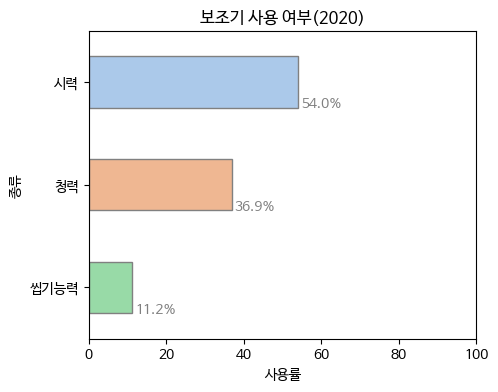

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))

sns.barplot(x='사용률', y=df3.index, data=df3.sort_values('사용률', ascending=False),
            palette="pastel", edgecolor='.5', width=.5)

for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()) + 6,
            p.get_y() + p.get_height(),
            f"{p.get_width():.1f}%",
            ha='center', color='gray')

plt.xlim(0, 100)
plt.title('보조기 사용 여부(2020)')

## 2) 일자리 참여한 사람 건강 전후 상태

### 노인일자리사업 참여 설문

In [4]:
df1 = pd.read_excel('/content/gdrive/MyDrive/공모전/미래와소프트_해커톤/data/노인일자리사업_참여의_노인_신체_및_정신적_기능_약화_예방_효과_인식_전체_응답자_20240109095620.xlsx')
df2 = pd.read_excel('/content/gdrive/MyDrive/공모전/미래와소프트_해커톤/data/노인일자리사업_참여자_효과_1순위__전체_응답자_20240109095919.xlsx')

df1.drop('특성별(1)', axis = 1, inplace=True)
df2.drop('특성별(1)', axis = 1, inplace=True)

df1.set_index('특성별(2)', inplace=True)
df2.set_index('특성별(2)', inplace=True)

In [5]:
display(df1, df2)

,전체 (명),약해지는 것을 전혀 예방하지 못함 (%),약해지는 것을 별로 예방하지 못함 (%),보통 (%),약해지는 것을 그럭저럭 예방함 (%),약해지는 것을 매우 예방함 (%)
특성별(2),,,,,,
소계,3596,0,1.1,11.3,46.6,41.0
60~64세,452,0,0.2,8.9,45.9,44.9
65~69세,803,0,2.1,13.7,43.9,40.3
70~74세,978,0,1.2,9.1,46.5,43.2
75세 이상,1363,0,0.9,11.8,47.3,40.1
독거,1101,0,1.5,11.3,45.5,41.7
노인부부,1863,0,0.8,10.1,50.4,38.7
본인+자녀동거,227,0,1.6,12.7,37.9,47.9
노인부부+자녀동거,314,0,0.2,15.0,40.3,44.5


,전체 (명),여가시간 활용 (%),신체건강 유지 (%),외로움 해소(우울 예방) (%),소득 증가 (%),일을 통한 보람과 즐거움 (%),기타 (%)
특성별(2),,,,,,,
소계,3596,11.5,15.5,5.8,56.6,10.4,0.1
60~64세,452,14.8,10.3,4.0,57.3,13.5,0.2
65~69세,803,12.1,12.0,5.7,58.0,12.0,0.2
70~74세,978,10.0,15.4,5.2,58.2,11.0,0.2
75세 이상,1363,11.8,16.7,6.2,55.6,9.6,0.1
독거,1101,10.6,14.1,7.3,59.2,8.7,0.0
노인부부,1863,12.8,16.9,4.9,53.8,11.5,0.1
본인+자녀동거,227,9.3,14.0,5.9,61.1,8.9,0.8
노인부부+자녀동거,314,12.7,14.3,4.3,55.3,13.4,0.0


In [ ]:
colors = sns.color_palette('Pastel1')
colors

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

Text(0.5, 1.0, '독거 노인의 신체 및 정신적 기능 약화 예방 효과 인식(2022)')

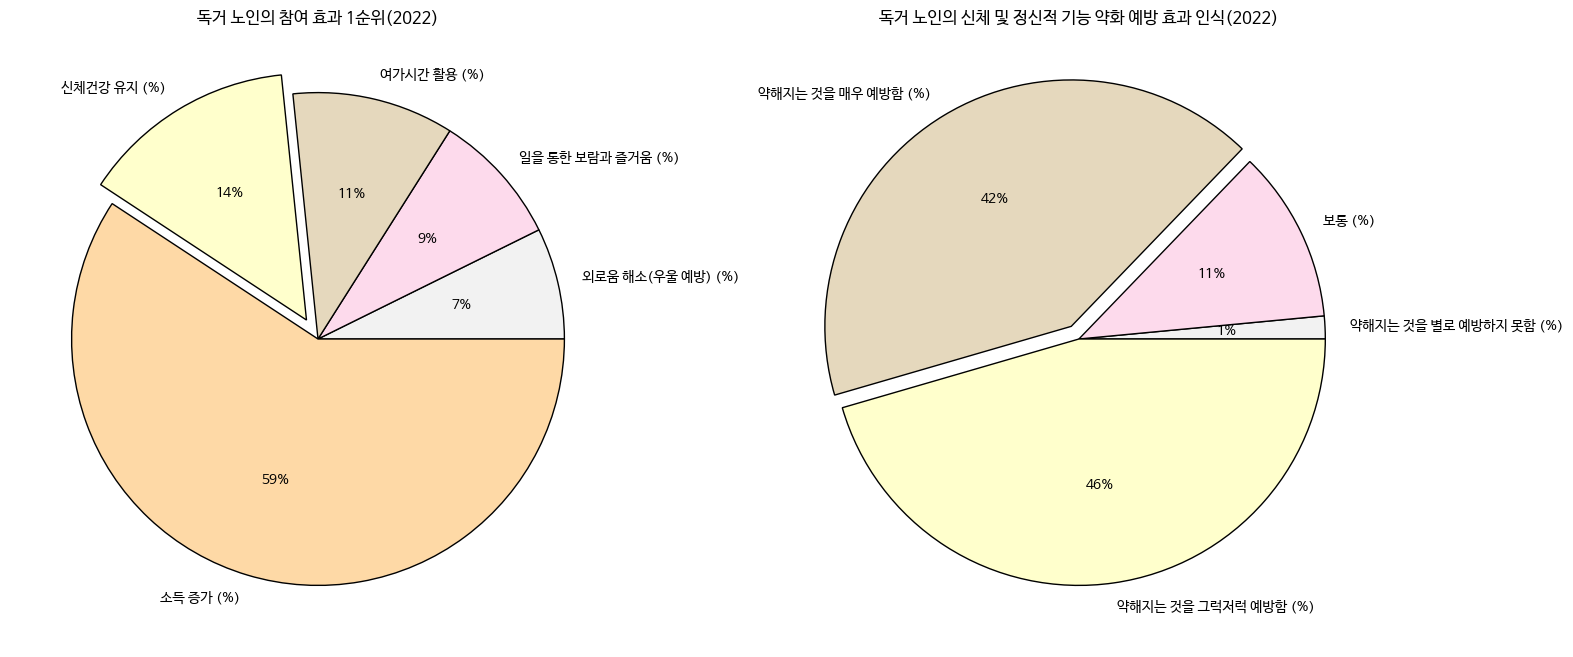

In [7]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

wedgeprops = {"linewidth": 1, 'width':1, "edgecolor":"k"}
colors = sns.color_palette('Pastel1')[::-1]

df_1 = df1.loc["독거"][2:].sort_values()
df_2 = df2.loc["독거"][1:-1].sort_values()

ax1.pie(df_2,
        labels=list(df_2.index),
        colors = colors, autopct='%.0f%%',
        explode = [0, 0, 0, 0.09, 0],
        counterclock=True,
        wedgeprops = wedgeprops)

ax2.pie(df_1,
        labels=list(df_1.index),
        colors = colors, autopct='%.0f%%',
        explode = [0, 0, 0.06, 0],
        counterclock=True,
        wedgeprops = wedgeprops)


ax1.set_title('독거 노인의 참여 효과 1순위(2022)')
ax2.set_title('독거 노인의 신체 및 정신적 기능 약화 예방 효과 인식(2022)')

전기 노년층의 고독사 원인은 외로움과 고립(8.9점), 신체･건강 문제(8.43점), 경제적 문제(8.06점), 공동체 붕괴(7.47점), 주거 문제(7.24점) 등의 순으로 인식되었다. \
후기 노년층의 고독사 원인은 외로움과 고립(9.02점)이 가장 크게 인식되고 있었으며, 신체･건강 문제(8.8점), 케어(돌봄) 문제(8.76점)와 주거 문제(8.76점) 등의 순으로 응답되었다.

In [49]:
df1 = pd.DataFrame({'외로움과 고립':[8.9], '신체/건강 문제':[8.43], '경제적 문제':[8.60], '공동체 붕괴':[7.47], '주거 문제':[7.24], '재취업 및 일자리 문제':[6.98], '케어(돌봄) 문제':[0]})
df2 = pd.DataFrame({'외로움과 고립':[9.02], '신체/건강 문제':[8.76], '경제적 문제':[8.04], '공동체 붕괴':[7.92], '주거 문제':[8.76], '재취업 및 일자리 문제':[0], '케어(돌봄) 문제':[8.76]})

In [50]:
display(df1)
display(df2)

,외로움과 고립,신체/건강 문제,경제적 문제,공동체 붕괴,주거 문제,재취업 및 일자리 문제,케어(돌봄) 문제
0,8.9,8.43,8.6,7.47,7.24,6.98,0


,외로움과 고립,신체/건강 문제,경제적 문제,공동체 붕괴,주거 문제,재취업 및 일자리 문제,케어(돌봄) 문제
0,9.02,8.76,8.04,7.92,8.76,0,8.76


In [51]:
df1 = df1.transpose()
df2 = df2.transpose()

In [52]:
display(df1)
display(df2)

,0
외로움과 고립,8.90
신체/건강 문제,8.43
경제적 문제,8.60
공동체 붕괴,7.47
주거 문제,7.24
재취업 및 일자리 문제,6.98
케어(돌봄) 문제,0.00


,0
외로움과 고립,9.02
신체/건강 문제,8.76
경제적 문제,8.04
공동체 붕괴,7.92
주거 문제,8.76
재취업 및 일자리 문제,0.00
케어(돌봄) 문제,8.76


In [ ]:
colors = sns.color_palette("ch:s=.25,rot=-.25")
colors.append(colors[-1])

In [ ]:
colors

[(0.7801075672866592, 0.8741945391838343, 0.9197573835143084),
 (0.6177504996551004, 0.7314502499602763, 0.8447555651263752),
 (0.4918432062949203, 0.5740168020110973, 0.7491328109279964),
 (0.39013304226733464, 0.4166783742582536, 0.622658850746535),
 (0.28792523273618836, 0.2611133597120989, 0.4523793400369642),
 (0.1676124288206785, 0.12168378009569247, 0.24493209028077442),
 (0.1676124288206785, 0.12168378009569247, 0.24493209028077442)]

In [ ]:
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

Text(0.5, 0, '전기 노년층(65세-74세) | 후기 노년층(75세 이상)  ')

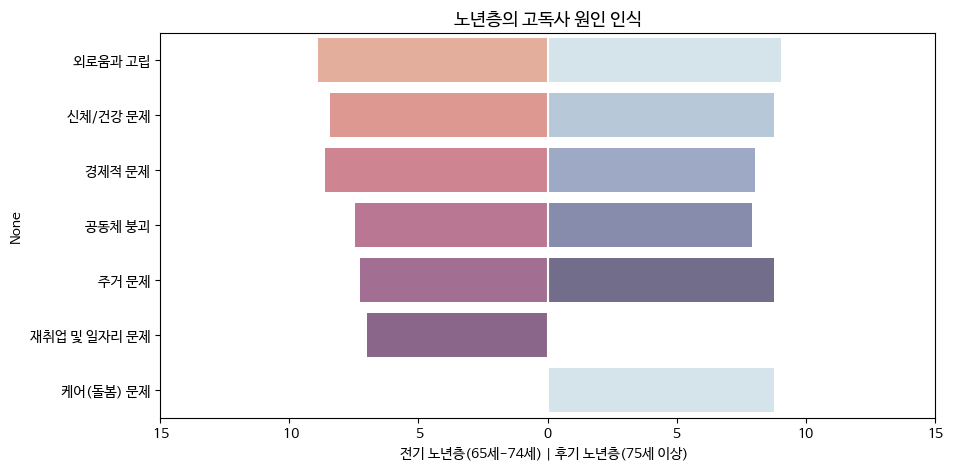

In [ ]:
fig = plt.figure(figsize=(10, 5))

df1[0] = df1[0]*(-1) # 양방향 막대 그래프 만들기 위해

col_names = df1.index.tolist()

bar_plot = sns.barplot(x=df1[0], y=df1.index,
                       order=col_names, data=df1, lw=0, palette=sns.color_palette("flare"), alpha=0.75)
bar_plot = sns.barplot(x=df2[0], y=df2.index,
                       order=col_names, data=df2,lw=0, palette=sns.color_palette("ch:s=.25,rot=-.25"), alpha=0.8)

plt.xlim(-10, 15)
plt.axvline(0, color='white', linestyle='-', linewidth=1.5)

plt.xlim([-15, 15])
plt.title("노년층의 고독사 원인 인식", fontsize=13)
plt.xlabel("전기 노년층(65세-74세) | 후기 노년층(75세 이상)  ")

## 3) 독거노인 비율 시각화

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/공모전/미래와소프트_해커톤/data/65세이상_독거노인_데이터.xlsx')
df.head()

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,65세이상인구,"5,366,109","5,515,179","5,766,729","6,022,659","6,277,126","6,541,168","6,757,083","7,066,060","7,366,085","7,688,994","8,151,867","8,569,865","8,981,133","9,435,816"
1,65세이상1인가구,"991,135","1,018,462","1,060,300","1,106,699","1,152,673","1,208,410","1,270,519","1,345,161","1,419,797","1,503,047","1,617,739","1,762,969","1,875,270","1,993,334"
2,독거노인비율,18.5,18.5,18.4,18.4,18.4,18.5,18.8,19.0,19.3,19.5,19.8,20.6,20.9,21.1


In [ ]:
df = df.set_index('Unnamed: 0').transpose().copy()
df

Unnamed: 0,65세이상인구,65세이상1인가구,독거노인비율
2010,"5,366,109","991,135",18.5
2011,"5,515,179","1,018,462",18.5
2012,"5,766,729","1,060,300",18.4
2013,"6,022,659","1,106,699",18.4
2014,"6,277,126","1,152,673",18.4
2015,"6,541,168","1,208,410",18.5
2016,"6,757,083","1,270,519",18.8
2017,"7,066,060","1,345,161",19.0
2018,"7,366,085","1,419,797",19.3
2019,"7,688,994","1,503,047",19.5


In [ ]:
df['65세이상인구'] = df['65세이상인구'].apply(lambda x: int(x.replace(',', '')))
df['65세이상1인가구'] = df['65세이상1인가구'].apply(lambda x: int(x.replace(',', '')))
df

Unnamed: 0,65세이상인구,65세이상1인가구,독거노인비율
2010,5366109,991135,18.5
2011,5515179,1018462,18.5
2012,5766729,1060300,18.4
2013,6022659,1106699,18.4
2014,6277126,1152673,18.4
2015,6541168,1208410,18.5
2016,6757083,1270519,18.8
2017,7066060,1345161,19.0
2018,7366085,1419797,19.3
2019,7688994,1503047,19.5


In [ ]:
df['65세'] = 1
df['독거노인비율'] = df['65세이상1인가구']/df['65세이상인구']
df

Unnamed: 0,65세이상인구,65세이상1인가구,독거노인비율,65세
2010,5366109,991135,0.184703,1
2011,5515179,1018462,0.184665,1
2012,5766729,1060300,0.183865,1
2013,6022659,1106699,0.183756,1
2014,6277126,1152673,0.183631,1
2015,6541168,1208410,0.184739,1
2016,6757083,1270519,0.188028,1
2017,7066060,1345161,0.190369,1
2018,7366085,1419797,0.192748,1
2019,7688994,1503047,0.195480,1


<Axes: ylabel='65세'>

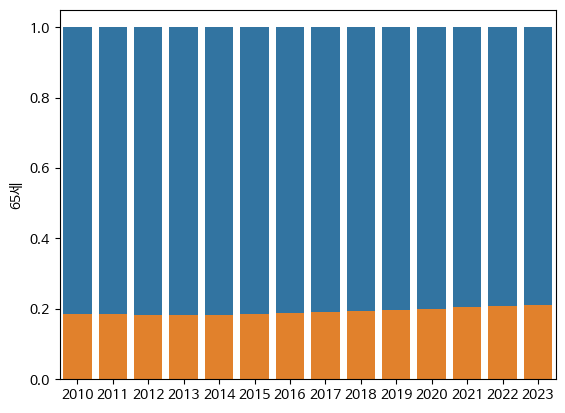

In [ ]:
sns.barplot(df['65세'])
sns.barplot(df['독거노인비율'])

In [8]:
df = pd.read_excel('/content/gdrive/MyDrive/공모전/미래와소프트_해커톤/data/65세이상_1인가구.xlsx')
df.head()

,연령별,2015,2016,2017,2018,2019,2020,2021,2022
0,합계,5203440,5397615,5618677,5848594,6147516,6643354,7165788,7502350
1,60~64세,354599,407575,445869,494506,531357,580701,646566,675366
2,65~69세,313584,335978,359563,375398,401256,458284,529542,577241
3,70~74세,308780,310716,313648,330897,352769,382524,413137,442851
4,75~79세,288138,304340,329899,340000,343332,350191,358008,366133


In [9]:
df = df.set_index('연령별').transpose().copy()
df

연령별,합계,60~64세,65~69세,70~74세,75~79세,80~84세,85세 이상,60세 이상
2015,5203440,354599,313584,308780,288138,197240,115427,1577768
2016,5397615,407575,335978,310716,304340,215488,127931,1702028
2017,5618677,445869,359563,313648,329899,229716,138136,1816831
2018,5848594,494506,375398,330897,340000,246166,152127,1939094
2019,6147516,531357,401256,352769,343332,264647,170843,2064204
2020,6643354,580701,458284,382524,350191,278856,190856,2241412
2021,7165788,646566,529542,413137,358008,304030,219717,2471000
2022,7502350,675366,577241,442851,366133,339221,247970,2648782


In [10]:
df['60세 이상 1인가구 비율'] = df['60세 이상']/df['합계']
df

연령별,합계,60~64세,65~69세,70~74세,75~79세,80~84세,85세 이상,60세 이상,60세 이상 1인가구 비율
2015,5203440,354599,313584,308780,288138,197240,115427,1577768,0.303216
2016,5397615,407575,335978,310716,304340,215488,127931,1702028,0.315330
2017,5618677,445869,359563,313648,329899,229716,138136,1816831,0.323356
2018,5848594,494506,375398,330897,340000,246166,152127,1939094,0.331549
2019,6147516,531357,401256,352769,343332,264647,170843,2064204,0.335779
2020,6643354,580701,458284,382524,350191,278856,190856,2241412,0.337392
2021,7165788,646566,529542,413137,358008,304030,219717,2471000,0.344833
2022,7502350,675366,577241,442851,366133,339221,247970,2648782,0.353060


In [ ]:
colors = sns.color_palette('Pastel1')
colors

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

Text(0.5, 1.0, '전체 1인가구 수 대비 60세 이상 독거노인 수')

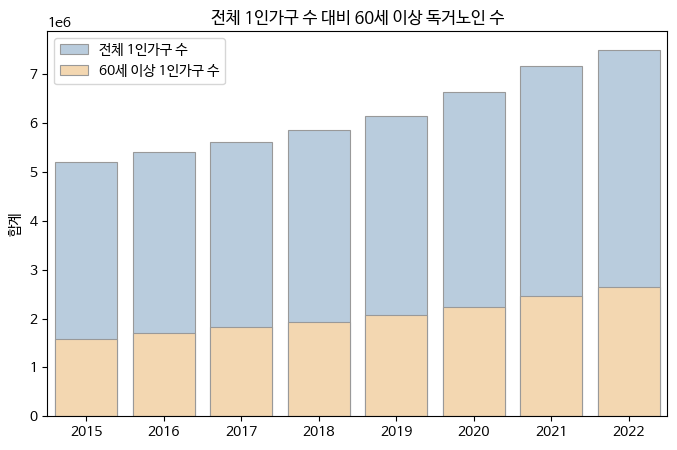

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(df['합계'], color=colors[1], label='전체 1인가구 수', linewidth=0.8, edgecolor=".6")
# sns.lineplot(df['합계'])
sns.barplot(df['60세 이상'], color=colors[4], label='60세 이상 1인가구 수', linewidth=0.8, edgecolor=".6")
# ax.bar_label(ax.containers[1], fontsize=7)
# sns.lineplot(df['60세 이상'])

plt.legend()
plt.title('전체 1인가구 수 대비 60세 이상 독거노인 수')

## 4) 사업에 대한 견해


In [149]:
df = pd.read_excel('/content/gdrive/MyDrive/공모전/미래와소프트_해커톤/data/사업에_대한_견해.xlsx')
df

,구분,전혀 그렇지 않다,그렇지 않다,보통이다,그렇다,매우 그렇다,평균
0,참여자의 업무수행능력을 향상시키는 것이 매우 중요하다,0.4,1.7,16.7,55,26.1,4.0
1,참여자의 업무관련 전문성을 강화할 수 있는 교육과 훈련이 강화되어야 한다,0.5,6.7,28.4,47,17.4,3.7


In [150]:
df.set_index('구분', inplace=True)

In [151]:
df.drop('평균', axis=1, inplace=True)
df

,전혀 그렇지 않다,그렇지 않다,보통이다,그렇다,매우 그렇다
구분,,,,,
참여자의 업무수행능력을 향상시키는 것이 매우 중요하다,0.4,1.7,16.7,55,26.1
참여자의 업무관련 전문성을 강화할 수 있는 교육과 훈련이 강화되어야 한다,0.5,6.7,28.4,47,17.4


In [152]:
df.loc['참여자의 업무수행능력을 향상시키는 것이 매우 중요하다'] = df.loc['참여자의 업무수행능력을 향상시키는 것이 매우 중요하다']*(-1)

In [153]:
df = df.transpose()

In [154]:
df

구분,참여자의 업무수행능력을 향상시키는 것이 매우 중요하다,참여자의 업무관련 전문성을 강화할 수 있는 교육과 훈련이 강화되어야 한다
전혀 그렇지 않다,-0.4,0.5
그렇지 않다,-1.7,6.7
보통이다,-16.7,28.4
그렇다,-55.0,47.0
매우 그렇다,-26.1,17.4


Text(0.5, 0, '                               참여자의 업무수행능력을 향상시키는 것이 매우 중요하다 | 참여자의 업무관련 전문성을 강화할 수 있는 교육과 훈련이 강화되어야 한다')

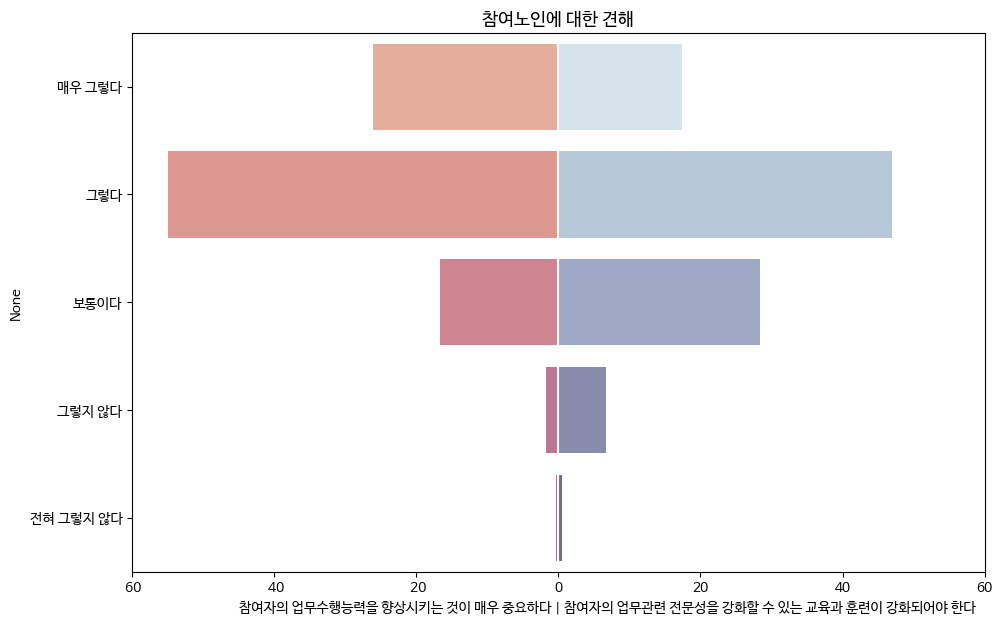

In [161]:
fig = plt.figure(figsize=(11, 7))

df1[0] = df1[0]*(-1) # 양방향 막대 그래프 만들기 위해

col_names = df.index.tolist()[::-1]

bar_plot = sns.barplot(x=df['참여자의 업무수행능력을 향상시키는 것이 매우 중요하다'], y=df.index,
                       order=col_names, data=df, lw=0, palette=sns.color_palette("flare"), alpha=0.75)
bar_plot = sns.barplot(x=df['참여자의 업무관련 전문성을 강화할 수 있는 교육과 훈련이 강화되어야 한다'], y=df.index,
                       order=col_names, data=df, lw=0, palette=sns.color_palette("ch:s=.25,rot=-.25"), alpha=0.8)

#plt.xlim(-10, 50)
plt.axvline(0, color='white', linestyle='-', linewidth=1.5)

plt.xlim([-60, 60])
plt.title("참여노인에 대한 견해", fontsize=13)
plt.xlabel("                               참여자의 업무수행능력을 향상시키는 것이 매우 중요하다 | 참여자의 업무관련 전문성을 강화할 수 있는 교육과 훈련이 강화되어야 한다")

In [127]:
df = pd.read_excel('/content/gdrive/MyDrive/공모전/미래와소프트_해커톤/data/노인일자리사업_참여_의향.xlsx')
df = df.transpose().drop('특성별(1)', axis=0)
df

,0
예 (%),95.7
기타 (%),4.3


In [128]:
df2 = pd.read_excel('/content/gdrive/MyDrive/공모전/미래와소프트_해커톤/data/희망업종.xlsx')
df2.set_index('구분', inplace=True)
df2

,1순위,2순위,평균,백분율
구분,,,,
시설관리/사업지원,25.0,2.9,13.95,0.263208
보건/사회복지,10.0,11.1,10.55,0.199057
제조업,13.9,7.0,10.45,0.197170
공공행정,7.9,11.0,9.45,0.178302
개인서비스업,3.0,14.2,8.60,0.162264


In [92]:
sns.color_palette('Pastel1')

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

Text(0.5, 1.0, '노인일자리사업 외 참여 희망 일자리 형태-희망 업종(2019)')

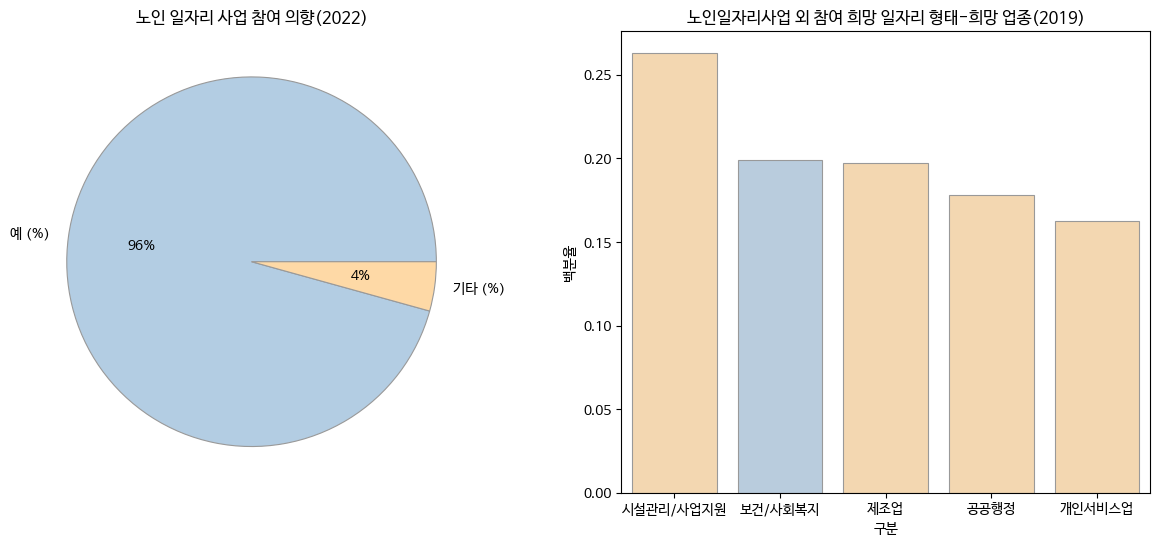

In [142]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

wedgeprops = {"linewidth": 0.8, 'width':1, "edgecolor":".6"}
colors  = []
colors.append(sns.color_palette('Pastel1')[1])
colors.append(sns.color_palette('Pastel1')[4])

palettes = []
palettes.append(sns.color_palette('Pastel1')[4])
palettes.append(sns.color_palette('Pastel1')[1])
palettes.append(sns.color_palette('Pastel1')[4])
palettes.append(sns.color_palette('Pastel1')[4])
palettes.append(sns.color_palette('Pastel1')[4])

ax1.pie(df[0],
        labels=list(df.index),
        colors = colors,
        autopct='%.0f%%',
        # explode = [0, 0, 0, 0.09, 0],
        counterclock=True,
        wedgeprops = wedgeprops
        )

sns.barplot(df2['백분율'],
            palette = palettes,
            axes=ax2,
            linewidth=0.8, edgecolor=".6"
            )


ax1.set_title('노인 일자리 사업 참여 의향(2022)')
ax2.set_title('노인일자리사업 외 참여 희망 일자리 형태-희망 업종(2019)')

Text(0.5, 1.0, '노인일자리사업 외 참여 희망 일자리 형태-희망 업종(2019)')

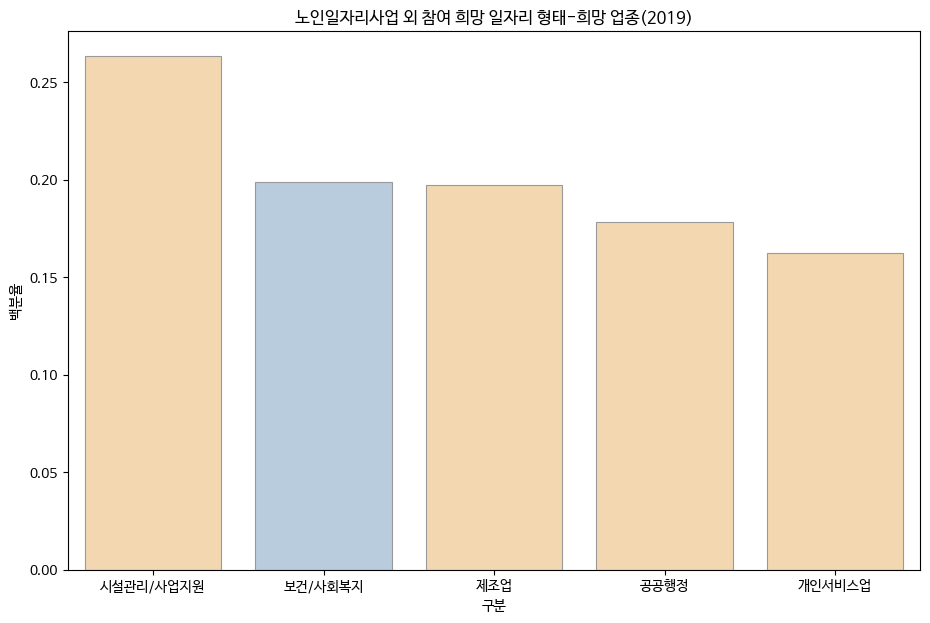

In [164]:
fig = plt.figure(figsize=(11, 7))

palettes = []
palettes.append(sns.color_palette('Pastel1')[4])
palettes.append(sns.color_palette('Pastel1')[1])
palettes.append(sns.color_palette('Pastel1')[4])
palettes.append(sns.color_palette('Pastel1')[4])
palettes.append(sns.color_palette('Pastel1')[4])

sns.barplot(df2['백분율'],
            palette = palettes,
            linewidth=0.8, edgecolor=".6"
            )

plt.title('노인일자리사업 외 참여 희망 일자리 형태-희망 업종(2019)')